In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#1: Loading Libraries

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

#2: Reading and Exploring Data

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Project/My Regression/Achilles_Data-Gold.csv')

In [ ]:
data.head()

,time,open,high,low,close,tick_volume,ema,obv
0,1672707720,1826.92,1827.65,1826.92,1827.24,47,2166.827022,47.0
1,1672707780,1827.26,1827.86,1827.18,1827.84,36,2166.827022,83.0
2,1672707840,1827.83,1828.70,1827.83,1828.66,47,2166.827022,130.0
3,1672707900,1828.65,1829.92,1828.62,1829.80,65,2166.827022,195.0
4,1672707960,1829.84,1830.94,1829.84,1830.63,87,2166.827022,282.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 708264 entries, 0 to 708263
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   time         708264 non-null  int64  
 1   open         708264 non-null  float64
 2   high         708264 non-null  float64
 3   low          708264 non-null  float64
 4   close        708264 non-null  float64
 5   tick_volume  708264 non-null  int64  
 6   ema          708264 non-null  float64
 7   obv          708264 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 43.2 MB


In [ ]:
data.describe()

,time,open,high,low,close,tick_volume,ema,obv
count,7.082640e+05,708264.000000,708264.000000,708264.000000,708264.000000,708264.000000,708264.000000,708264.000000
mean,1.704141e+09,2166.827725,2167.117670,2166.537169,2166.828777,87.172062,2166.827022,111304.556951
std,1.819117e+07,276.537254,276.600773,276.472119,276.537495,67.389911,276.526264,137554.839012
min,1.672708e+09,1806.640000,1806.840000,1804.750000,1806.680000,1.000000,1808.018055,-17801.000000
25%,1.688442e+09,1945.370000,1945.560000,1945.170000,1945.370000,39.000000,1945.398445,3884.000000
50%,1.704253e+09,2028.970000,2029.200000,2028.720000,2028.970000,67.000000,2028.968310,63419.000000
75%,1.719968e+09,2381.780000,2382.170000,2381.420000,2381.780000,118.000000,2381.923933,153891.500000
max,1.735689e+09,2789.860000,2790.100000,2789.620000,2789.870000,547.000000,2789.087992,469474.000000


In [ ]:
data.shape

(708264, 8)

In [ ]:
data.columns

Index(['time', 'open', 'high', 'low', 'close', 'tick_volume', 'ema', 'obv'], dtype='object')

In [ ]:
data.nunique()

,0
time,708264
open,82314
high,82206
low,82325
close,82364
tick_volume,504
ema,708244
obv,242831


#3: Data Cleaning

###Checking Null Values

In [ ]:
data.isnull().sum()

,0
time,0
open,0
high,0
low,0
close,0
tick_volume,0
ema,0
obv,0


###Checking Duplicates


In [ ]:
data.duplicated().sum()

np.int64(0)

#4: Outlier Detection and Removal

In [ ]:
features = ["close", "open", "high", "low", "ema"]
Q1 = data[features].quantile(0.25)
Q3 = data[features].quantile(0.75)
IQR = Q3 - Q1


outlier_removed_data = data[~((data[features] < (Q1 - 1.5 * IQR)) | (data[features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
outlier_removed_data.shape

(708264, 8)

### Box plot before removing outliers

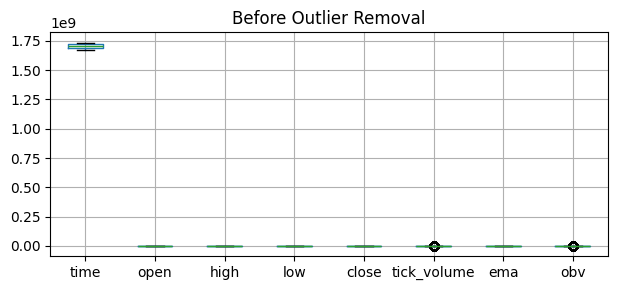

In [ ]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
data.boxplot()
plt.title("Before Outlier Removal")

plt.tight_layout()
plt.show()

### Box plot after removing outliers

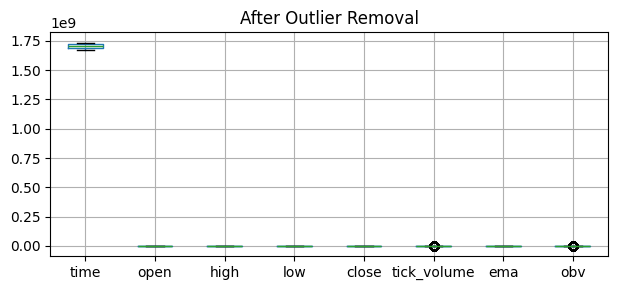

In [ ]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 2)
outlier_removed_data.boxplot()
plt.title("After Outlier Removal")

plt.tight_layout()
plt.show()

#5: Data Transformation


### Standardization

In [ ]:
features_to_scale = ["open", "high", "low", "tick_volume", "ema", "obv"]
x = outlier_removed_data[features_to_scale]
y = outlier_removed_data['close']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### Plot the Standardized data

Text(0.5, 1.0, 'Scaled Numerical Features')

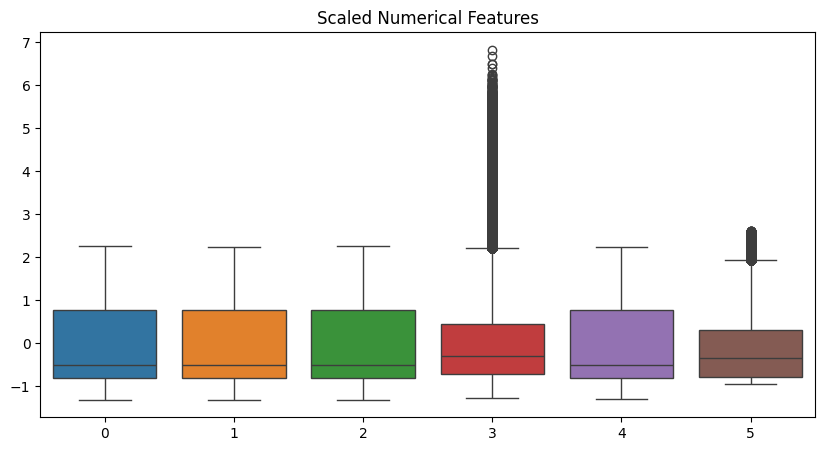

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=x_scaled)
plt.title('Scaled Numerical Features')

##Plot the Target Value Distribution

Text(0.5, 0, 'Conterfeit')

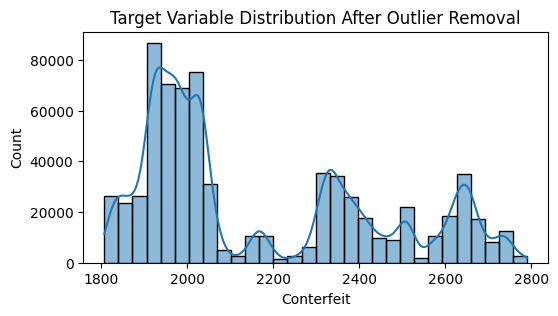

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(y, bins=30, kde=True)
plt.title('Target Variable Distribution After Outlier Removal')
plt.xlabel('Conterfeit')

#6: Principal Component Analysis

In [ ]:
pca = PCA(n_components=6)
x_pca = pca.fit_transform(x_scaled)

### Plot the PCA transformed data

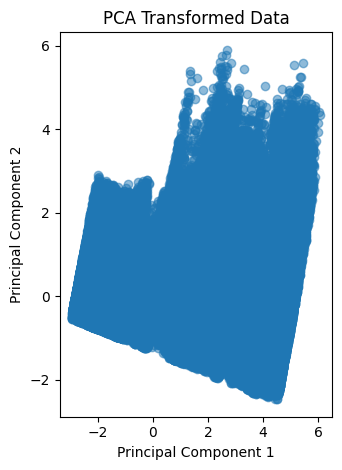

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(x_pca[:, 0], x_pca[:, 1], alpha=0.5)
plt.title('PCA Transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.tight_layout()
plt.show()

#7: Splitting Data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42)

#8: Linear Regression

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

#9: Evaluation Metrics

In [ ]:
y_pred = model.predict(x_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\nEvaluation Metrics:")
print(f"MAE:  {mae:.2f}")
print(f"MSE:  {mse:.2f}")
print(f"RMSE: {rmse:.2f}")


Evaluation Metrics:
MAE:  0.14
MSE:  0.04
RMSE: 0.21


#10: Sample Prediction

In [ ]:
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print("\nSample Predictions:\n", results.head())


Sample Predictions:
     Actual    Predicted
0  2331.28  2331.350590
1  1927.66  1927.647141
2  1950.58  1950.719322
3  1907.60  1907.736168
4  2522.43  2522.224296


#11: Predicting on Unseen Data

In [ ]:
new_data = pd.DataFrame({
    "open": [1900.5],
    "high": [1920.7],
    "low": [1885.3],
    "tick_volume": [123456],
    "ema": [1902.6],
    "obv": [4567890]
})

new_data_scaled = scaler.transform(new_data)

new_data_pca = pca.transform(new_data_scaled)

predicted_price = model.predict(new_data_pca)

print("\nPredicted Gold Price:", predicted_price[0])


Predicted Gold Price: 1898.6767470229572
